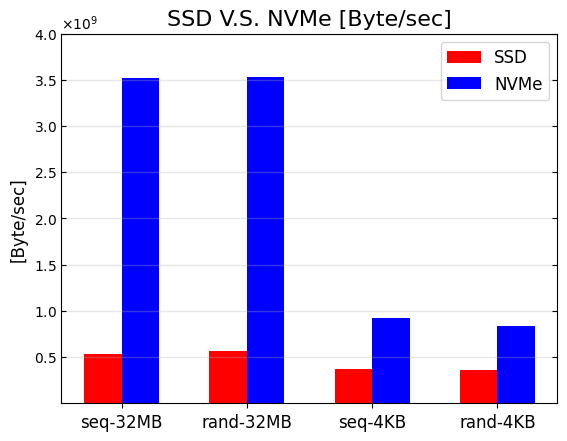

In [8]:
def addTargetFile(dirName):
    ret = {}
    ret[dirName] = []
    ret[dirName].append("randR-32MB.txt")
    ret[dirName].append("randR-4KB.txt")
    ret[dirName].append("randW-32MB.txt")
    ret[dirName].append("randW-4KB.txt")
    ret[dirName].append("seqR-32MB.txt")
    ret[dirName].append("seqR-4KB.txt")
    ret[dirName].append("seqW-32MB.txt")
    ret[dirName].append("seqW-4KB.txt")
    return ret


ResultFile = []
# ResultFile.append(addTargetFile("M1-MBA2020-1TB-SSD"))
# ResultFile.append(addTargetFile("MP-1TB-SSD"))
ResultFile.append(addTargetFile("xeon01-1TB-SSD"))
ResultFile.append(addTargetFile("xeon01-2TB-KIOXIA-NVMe"))

data = {}

for k in ResultFile:
    for kk,vv in k.items():
        for name in vv:
            with open('results/'+kk+'/'+name) as f:
                df = json.load(f)
                name = name.replace(".txt", "")
                
                if "R" in name: # read case
                    name = name.replace("R", "")
                    if not kk in data.keys():
                        data[kk] = {}
                    if not "read" in data[kk].keys():
                        data[kk]['read'] = {}
                    if not name in data[kk]['read'].keys():
                        data[kk]['read'][name] = {}
                    data[kk]['read'][name]['bw'] = df['jobs'][0]['read']['bw'] * 1024
                    data[kk]['read'][name]['iops'] = int(df['jobs'][0]['read']['iops'])

                else: # write case
                    name = name.replace("W", "")
                    if not kk in data.keys():
                        data[kk] = {}
                    if not "write" in data[kk].keys():
                        data[kk]['write'] = {}
                    if not name in data[kk]['write'].keys():
                        data[kk]['write'][name] = {}

                    data[kk]['write'][name]['bw'] = df['jobs'][0]['write']['bw'] * 1024
                    data[kk]['write'][name]['iops'] = int(df['jobs'][0]['write']['iops'])
print()
if (0):
    for k, v in data.items():
        print(k)
        for kk, vv in v.items():
            print(kk)
            print(vv)
        print()
    print (data["xeon01-1TB-SSD"]["read"]["rand-32MB"]["bw"])

    
    

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np


y1 = [
    data["xeon01-1TB-SSD"]["read"]["seq-32MB"]["bw"],
    data["xeon01-1TB-SSD"]["read"]["rand-32MB"]["bw"],
    data["xeon01-1TB-SSD"]["read"]["seq-4KB"]["bw"],
    data["xeon01-1TB-SSD"]["read"]["rand-4KB"]["bw"],
]

y2 = [
    data["xeon01-2TB-KIOXIA-NVMe"]["read"]["seq-32MB"]["bw"],
    data["xeon01-2TB-KIOXIA-NVMe"]["read"]["rand-32MB"]["bw"],
    data["xeon01-2TB-KIOXIA-NVMe"]["read"]["seq-4KB"]["bw"],
    data["xeon01-2TB-KIOXIA-NVMe"]["read"]["rand-4KB"]["bw"],
]
x1 = np.arange(len(y1))

plt.title('SSD V.S. NVMe [Byte/sec]', fontsize=16)
plt.ylabel('[Byte/sec]', fontsize=12)
labels = ['seq-32MB', 'rand-32MB', 'seq-4KB', 'rand-4KB', ]


width = 0.3
p_y1 = plt.bar(x1,       y1, color='r', width=width, align='center')
p_y2 = plt.bar(x1+width, y2, color='b', width=width, align='center')
plt.legend((p_y1[0], p_y2[0]), ("SSD", "NVMe"), loc='upper right', ncol=1, fontsize=12)
plt.grid(axis="y", alpha=0.3, lw=1)
plt.gca().yaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)

#y軸小数点以下3桁表示
# plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda v,p: f'{int(v):,d}'))
# plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.0e')) #y軸小数点以下3桁表示
# plt.ticklabel_format(style='plain',axis='y')
plt.ticklabel_format(style='sci',axis='y', useMathText=True)


plt.xticks(x1 + width/2, labels, fontsize=12)
plt.ylim(1, 4000000000)
plt.savefig('SSD-NVMe-bps.svg')


plt.show()
# plt.savefig("graph1.svg") 
# plt.savefig("graph1.png") 


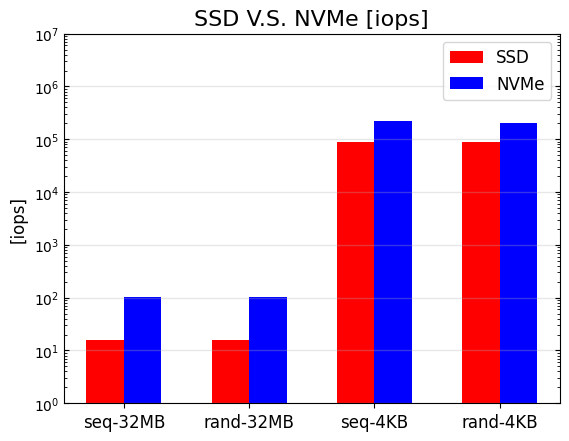

In [6]:

y1 = [
    data["xeon01-1TB-SSD"]["read"]["seq-32MB"]["iops"],
    data["xeon01-1TB-SSD"]["read"]["rand-32MB"]["iops"],
    data["xeon01-1TB-SSD"]["read"]["seq-4KB"]["iops"],
    data["xeon01-1TB-SSD"]["read"]["rand-4KB"]["iops"],
]

y2 = [
    data["xeon01-2TB-KIOXIA-NVMe"]["read"]["seq-32MB"]["iops"],
    data["xeon01-2TB-KIOXIA-NVMe"]["read"]["rand-32MB"]["iops"],
    data["xeon01-2TB-KIOXIA-NVMe"]["read"]["seq-4KB"]["iops"],
    data["xeon01-2TB-KIOXIA-NVMe"]["read"]["rand-4KB"]["iops"],
]
x1 = np.arange(len(y1))

plt.title('SSD V.S. NVMe [iops]', fontsize=16)
plt.ylabel('[iops]', fontsize=12)
labels = ['seq-32MB', 'rand-32MB', 'seq-4KB', 'rand-4KB', ]


width = 0.3
p_y1 = plt.bar(x1,       y1, color='r', width=width, align='center')
p_y2 = plt.bar(x1+width, y2, color='b', width=width, align='center')
plt.legend((p_y1[0], p_y2[0]), ("SSD", "NVMe"), loc='upper right', ncol=1, fontsize=12)
plt.grid(axis="y", alpha=0.3, lw=1)
plt.gca().yaxis.set_tick_params(which='both', direction='in',bottom=True, top=True, left=True, right=True)

#y軸小数点以下3桁表示
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda v,p: f'{int(v):,d}'))
# plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.0e')) #y軸小数点以下3桁表示
# plt.ticklabel_format(style='plain',axis='y')
# plt.ticklabel_format(style='sci',axis='y')


plt.xticks(x1 + width/2, labels, fontsize=12)
plt.yscale("log")
plt.ylim(1, 10000000)

plt.savefig('SSD-NVMe-iops.svg')
plt.show()